In [4]:
# train station location nsw
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

#nsw_train = pd.read_csv("StationEntrances2018.csv")

In [32]:
# train station location nsw
import pandas as pd
nsw_train = pd.read_csv("StationEntrances2018.csv")
clean_nsw_train = nsw_train[["LAT","LONG"]]
clean_nsw_train.rename(columns={"LAT":"Lat","LONG":"Lon"},inplace=True)
clean_nsw_train.to_csv("nsw-train-stations.csv", header=False, index=False)

In [18]:
clean_nsw_train.rename(columns={"LAT":"Lat","LONG":"Lon"},inplace=True)

/home/oscar/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [23]:
clean_nsw_train.to_csv("test.csv", header=False, index=False)

In [56]:
coord_lat_lon = clean_nsw_train[["Lon","Lat"]].values.tolist()

In [5]:
# from pyproj import Proj, Transformer
class CoordTransformer:
    def __init__(self, proj_from=28356, proj_to=4326):
        self.transformer = Transformer.from_crs(proj_from,proj_to)
    def transform_coord_list(self,xx,yy):
        # lon, lat
        return self.transformer.transform(xx=xx, yy=yy)


from pyproj import Proj, Transformer
def transform_coord_list(xx,yy, proj_from=28356, proj_to=4326):
    transformer = Transformer.from_crs(proj_from,proj_to)
    return transformer.transform(xx=xx, yy=yy)


In [4]:
t = [(1,2),(3,4),(5,6)]
a,b = zip(*t )
a,b

((1, 3, 5), (2, 4, 6))

In [5]:
innov_fp = "stocktake-of-australian-innovation-precincts-csv-july-2019-qa.csv"
innov_df = pd.read_csv(innov_fp, encoding="1252")
innov_df = innov_df[["Longitude","Latitude"]]


In [6]:
projected = transform_coord_list(innov_df.values.tolist())
results_df = pd.DataFrame(projected)
results_df["weight"] = 1
results_df.to_csv("aus-innovation-projected.csv", header=False, index=False)

In [7]:
school_vic_fp = "dv279-schoollocations2019.csv"
school_vic = pd.read_csv(school_vic_fp,encoding="1252")

In [8]:
school_vic.head(2)

,Education_Sector,Entity_Type,School_No,School_Name,School_Type,School_Status,Address_Line_1,Address_Line_2,Address_Town,Address_State,...,Postal_Address_Line_1,Postal_Address_Line_2,Postal_Town,Postal_State,Postal_Postcode,Full_Phone_No,LGA_ID,LGA_Name,X,Y
0,Government,1,1,Alberton Primary School,Primary,O,21 Thomson Street,NaN,Alberton,VIC,...,21 Thomson Street,NaN,ALBERTON,VIC,3971,03 5183 2412,681,Wellington (S),146.666601,-38.617713
1,Government,1,3,Allansford and District Primary School,Primary,O,Frank Street,NaN,Allansford,VIC,...,Frank Street,NaN,ALLANSFORD,VIC,3277,03 5565 1382,673,Warrnambool (C),142.590393,-38.386281


In [9]:
school_vic = school_vic[["X","Y","School_Type"]]

In [10]:
school_vic = school_vic[school_vic.School_Type.apply(lambda x: x in ["Pri/Sec","Secondary"])]

In [11]:
school_vic.drop("School_Type",axis=1, inplace=True)


In [12]:
projected = transform_coord_list(school_vic.values.tolist())
results_df = pd.DataFrame(projected)
results_df["weight"] = 1
results_df.to_csv("secondary-schools-vic.csv", header=False, index=False)

In [8]:

ultimo = pd.read_csv("ultimo.csv", index_col=0)



In [65]:
transform_coord_list(*ultimo.head()[["lat","lon"]].values.tolist()[0])


(-33.87453318958073, 151.19479219256195)

In [20]:
ultimo['lon'].values[1:] - ultimo['lon'].values[:-1]

array([21., 21., 21., ..., 21., 21., 21.])

In [30]:
coord_tsfmr = CoordTransformer()
def get_4_coords(xy):
    x, y = xy
    return tuple(zip(*coord_tsfmr.transform_coord_list(
        [x, x+interval, x+interval, x],
        [y, y, y+interval, y+interval]#,proj_from=28356, proj_to=4326
    )))

In [31]:
import numpy as np
from itertools import chain    

interval=21
coord_tsfmr = CoordTransformer()
def get_4_coords(xy):
    x, y = xy
    return tuple(zip(*coord_tsfmr.transform_coord_list(
        [x, x+interval, x+interval, x],
        [y, y, y+interval, y+interval]#,proj_from=28356, proj_to=4326
    )))

new = []
for i, row in ultimo.loc[:200].iterrows():
    clat, clon, val = row[['lat', 'lon', 'value']]
    new.append((
        *chain.from_iterable(get_4_coords((clat, clon))),
        val
    ))
    

print('tllat,tllon,trlat,trlon,brlat,brlon,bllat,bllon,value')
for v in new:
    print(','.join(map(str, v)))
        
# interval=5000
# tl = (301534,6257788)
# br = (339396,6239124)

# tl_x = list(np.arange(tl[0],br[0]+interval,interval))
# tl_y = list(np.arange(br[1],tl[1]+interval,interval))

tllat,tllon,trlat,trlon,brlat,brlon,bllat,bllon,value
-33.87453318958073,151.19479219256195,-33.87453651492958,151.19501914734377,-33.874347208010775,151.19502313374312,-33.87434388268554,151.19479617946186,1.0578102136033e-311
-33.87434388268554,151.19479617946186,-33.874347208010775,151.19502313374312,-33.874157901085766,151.19502712010524,-33.87415457578412,151.1948001663246,2.1219957905e-314
-33.87415457578412,151.1948001663246,-33.874157901085766,151.19502712010524,-33.87396859415448,151.19503110643015,-33.87396526887645,151.19480415315007,1.0578115798727e-311
-33.87396526887645,151.19480415315007,-33.87396859415448,151.19503110643015,-33.87377928721698,151.19503509271783,-33.87377596196256,151.19480813993832,0.0
-33.87377596196256,151.19480813993832,-33.87377928721698,151.19503509271783,-33.873589980273245,151.1950390789683,-33.87358665504241,151.19481212668933,0.0
-33.87358665504241,151.19481212668933,-33.873589980273245,151.1950390789683,-33.87340067332325,151.19504306518152,-3

In [10]:
list(map(float,ultimo.head()["value"]))

[1.0578102136033e-311, 2.1219957905e-314, 1.0578115798727e-311, 0.0, 0.0]

/home/oscar/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:39: RuntimeWarning: overflow encountered in double_scalars
  return int(np.ceil((a.max() - a.min()) / h))


OverflowError: cannot convert float infinity to integer

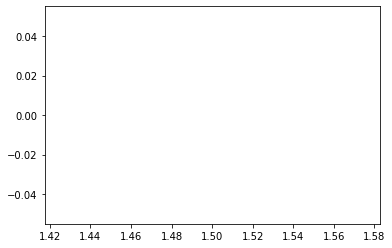

In [50]:
import seaborn as sns

sns.distplot(ultimo["value"])

In [25]:
liverpool = pd.read_csv("liverpool.csv")
liverpool.head()
melbourne = pd.read_csv("melbourne.csv")
melbourne.head()

,Unnamed: 0,lat,lon,value
0,0,310826.01821,5.803309e+06,8.108460e-312
1,1,310826.01821,5.803405e+06,0.000000e+00
2,2,310826.01821,5.803501e+06,0.000000e+00
3,3,310826.01821,5.803597e+06,0.000000e+00
4,4,310826.01821,5.803693e+06,7.410985e-323


In [59]:
test_merge = pd.merge(liverpool.astype(int),melbourne.astype(int),how='inner',on='lat')
test_merge.head()

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [33]:
new = []
for i, row in liverpool.iterrows():
    clat, clon, val = row[['lat', 'lon', 'value']]
    new.append((
        *chain.from_iterable(get_4_coords((clat, clon))),
        val
    ))

with open('liverpool-processed.csv', 'w') as f:
    print('tllat,tllon,trlat,trlon,brlat,brlon,bllat,bllon,value', file=f)
    for v in new:
        print(','.join(map(str, v)),file=f)

In [34]:
new = []
for i, row in melbourne.iterrows():
    clat, clon, val = row[['lat', 'lon', 'value']]
    new.append((
        *chain.from_iterable(get_4_coords((clat, clon))),
        val
    ))

with open('melbourne-processed.csv', 'w') as f:
    print('tllat,tllon,trlat,trlon,brlat,brlon,bllat,bllon,value', file=f)
    for v in new:
        print(','.join(map(str, v)),file=f)

In [6]:
interval=500 
tl_x = ultimo.lon.values
tl_y = ultimo.lat.values

from itertools import chain
tl_xv, tl_yv = np.meshgrid(tl_x,tl_y)



def get_4_coords(xy):
    x, y = xy
    return tuple(zip(*transform_coord_list(
        [x, x+interval, x+interval, x],
        [y, y, y+interval, y+interval],
        proj_from=28356, proj_to=4326
    )))


vals = list(map(get_4_coords, zip(tl_xv.flat, tl_yv.flat)))
#plt.scatter(*zip(*chain.from_iterable(vals)))


#[(*v, 0,3,7,) for v in vals]
#plt.scatter(*zip(*list(map(get_4_coords, zip(tl_xv.flat, tl_yv.flat)))))

#tl_xp, tl_yp = transform_coord_list(tl_xv,tl_yv, proj_from=28356, proj_to=4326)
#br_xp, br_yp = transform_coord_list(br_xv,br_yv, proj_from=28356, proj_to=4326)

NameError: name 'ultimo' is not defined

In [22]:
ultimo2 =pd.read_csv("ultimo-processed.csv")
ultimo2.head()

,tllat,tllon,trlat,trlon,brlat,brlon,bllat,bllon,value
0,-33.874533,151.194792,-33.874537,151.195019,-33.874347,151.195023,-33.874344,151.194796,1.057810e-311
1,-33.874344,151.194796,-33.874347,151.195023,-33.874158,151.195027,-33.874155,151.194800,2.121996e-314
2,-33.874155,151.194800,-33.874158,151.195027,-33.873969,151.195031,-33.873965,151.194804,1.057812e-311
3,-33.873965,151.194804,-33.873969,151.195031,-33.873779,151.195035,-33.873776,151.194808,0.000000e+00
4,-33.873776,151.194808,-33.873779,151.195035,-33.873590,151.195039,-33.873587,151.194812,0.000000e+00


In [27]:
import folium
from folium import Map, Rectangle, Polygon
from folium.vector_layers import CircleMarker
from contextlib import suppress
location = (-33.922889709472656, 150.92666625976562)#list(map(np.mean,zip(*buses)))


m = Map(location=location, 
        tiles='stamentoner', 
        zoom_start=10)

 	 		 	
    
for i,vals in ultimo2.iteritems(): 
    pts = [(vals[0],vals[1]),(vals[2],vals[3]),(vals[4],vals[5]),(vals[6],vals[7])]
    pts = [(b,a) for a,b in pts]
    #print(points)
    for p in pts:
        print(p)
        CircleMarker(p).add_to(m)
    
    
m.save("test.html")
m

(-33.87434388268554, -33.87453318958073)
(-33.87396526887645, -33.87415457578412)
(-33.87358665504241, -33.87377596196256)
(-33.873208041183425, -33.87339734811604)
(151.1947961794619, 151.19479219256198)
(151.1948041531501, 151.1948001663246)
(151.19481212668933, 151.19480813993832)
(151.19482010007968, 151.19481611340314)
(-33.87434720801077, -33.874536514929574)
(-33.87396859415448, -33.874157901085766)
(-33.873589980273245, -33.87377928721698)
(-33.87321136636704, -33.87340067332325)
(151.19502313374312, 151.19501914734374)
(151.19503110643015, 151.19502712010524)
(151.1950390789683, 151.19503509271783)
(151.19504705135756, 151.19504306518152)
(-33.874157901085766, -33.87434720801077)
(-33.87377928721698, -33.87396859415448)
(-33.87340067332325, -33.873589980273245)
(-33.873022059404576, -33.87321136636704)
(151.19502712010524, 151.19502313374312)
(151.19503509271783, 151.19503110643015)
(151.19504306518152, 151.1950390789683)
(151.19505103749637, 151.19504705135756)
(-33.874154575

In [24]:
import csv
headers = ["tl_lon","tl_lat","br_lon","br_lat","weight"]
weights = np.random.randint(0,11,len(dummy_merged))

with open("nopanda.csv","w") as outfile:
    outfile.write(",".join(headers))
    for (tl_lon,tl_lat),(br_lon,br_lat),weight in zip(coords_tl,coords_br,weights):
        outfile.write("\n"+f"{tl_lon},{tl_lat},{br_lon},{br_lat},{weight}")

NameError: name 'np' is not defined

In [ ]:
dummy_tl = pd.DataFrame([tl_xp,tl_yp], columns=["tl_lon","tl_lat"])
dummy_br = pd.DataFrame(1, columns=["br_lon","br_lat"])
dummy_merged = pd.merge(dummy_tl,dummy_br, left_index=True,right_index=True)

In [ ]:
# add random test data.
for i in range(1,2):
    dummy_merged[f"indicator_{i}"] = np.random.randint(0,11,len(dummy_merged))


In [ ]:
dummy_merged.head()

In [129]:
dummy_merged.to_csv("dummy-data-tlbr-indicators.csv", header=True, index=False)

In [130]:
coords_tl[:5],coords_br[:5]

([(-33.96970174187253, 150.85183922936713),
  (-33.969796070769995, 150.8572478176217),
  (-33.96989016220635, 150.8626564310042),
  (-33.969984016177904, 150.86806506945152),
  (-33.97007763268105, 150.87347373290032)],
 [(-33.97439439886882, 150.8572406474324),
  (-33.974488501751274, 150.86264955193076),
  (-33.974582367128036, 150.86805848149805),
  (-33.97467599499546, 150.87346743607105),
  (-33.97476938534988, 150.8788764155865)])

In [131]:
test = transform_coord_list([(0,0),(6,6)], proj_from=28356, proj_to=4326)
xpad,ypad=[abs(a-b) for a,b in zip(*test)]

TypeError: transform_coord_list() missing 1 required positional argument: 'yy'

In [148]:
xpaddddd

5.379701239860424e-05

In [35]:
import gc;gc.collect()

242

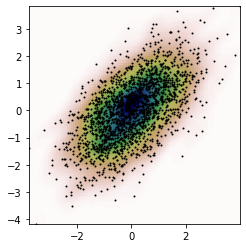

In [37]:
from scipy import stats
def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2


m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

#Perform a kernel density estimate on the data:

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

#Plot the results:

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

